In [2]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replaceing the blanks with zero is tenure is 0and no total charges are recorded

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df["customerID"].duplicated().sum()

0

In [17]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

#converted 0 and 1 value of senior citizen to yes/no to make it easier to understand

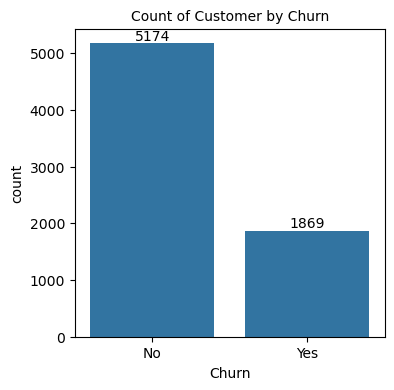

In [81]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Churn' , data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn", fontsize = 10)
plt.show()

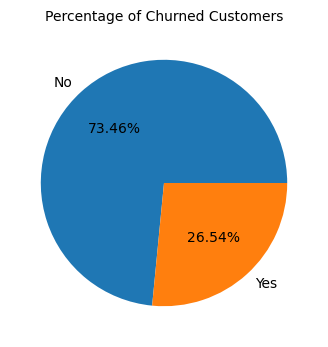

In [79]:
plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#from the given piechart we can conclude that 26.54% of our customers have churned out.
#now lets explore the reason behind it

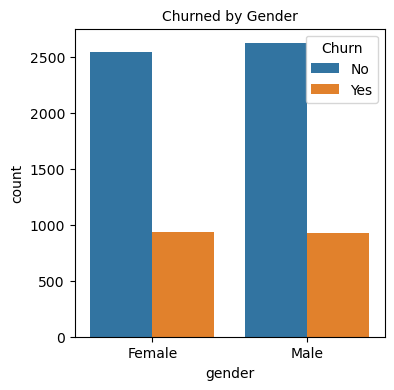

In [82]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn"), 
plt.title("Churned by Gender", fontsize = 10)
plt.show()

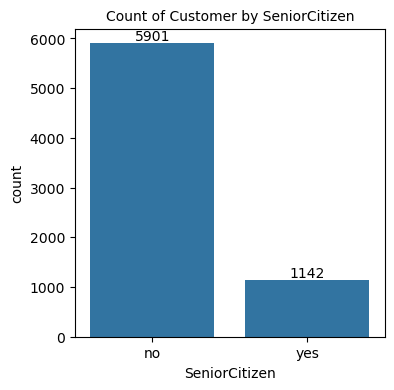

In [83]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by SeniorCitizen", fontsize = 10)
plt.show()

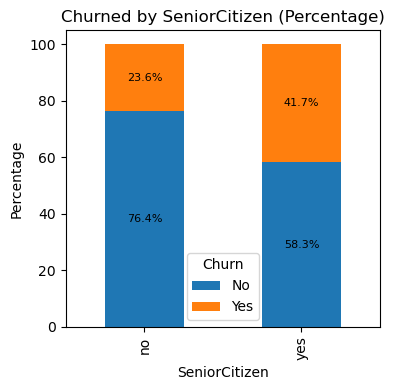

In [99]:
colors = {'No': '#1f77b4', 'Yes': '#ff7f0e'}  # Blue and orange

# Step 1: Prepare percentage data
crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Step 2: Plot stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(4, 4), color=colors)

# Add percentage labels
for i, row in enumerate(crosstab.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            plt.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=8)
            cumulative += val

# Final touches
plt.title("Churned by SeniorCitizen (Percentage)", )
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

#comparatively a greater percentage of people in senior citizen category have churned

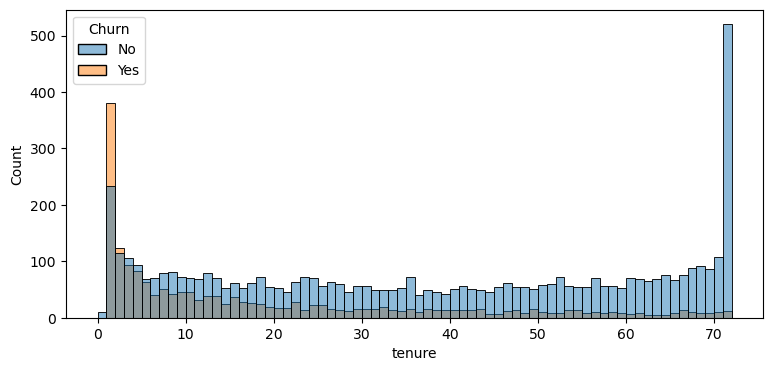

In [74]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

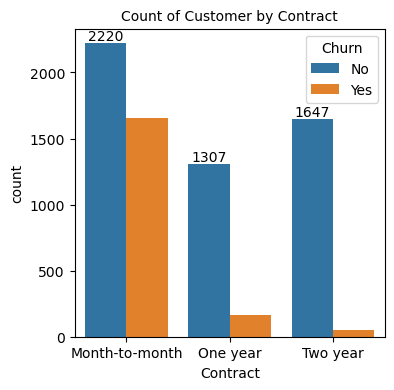

In [86]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract",fontsize = 10)
plt.show()

#people who have month to month contract are likely churn then form those who have 1 or 2 years of contract

In [87]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

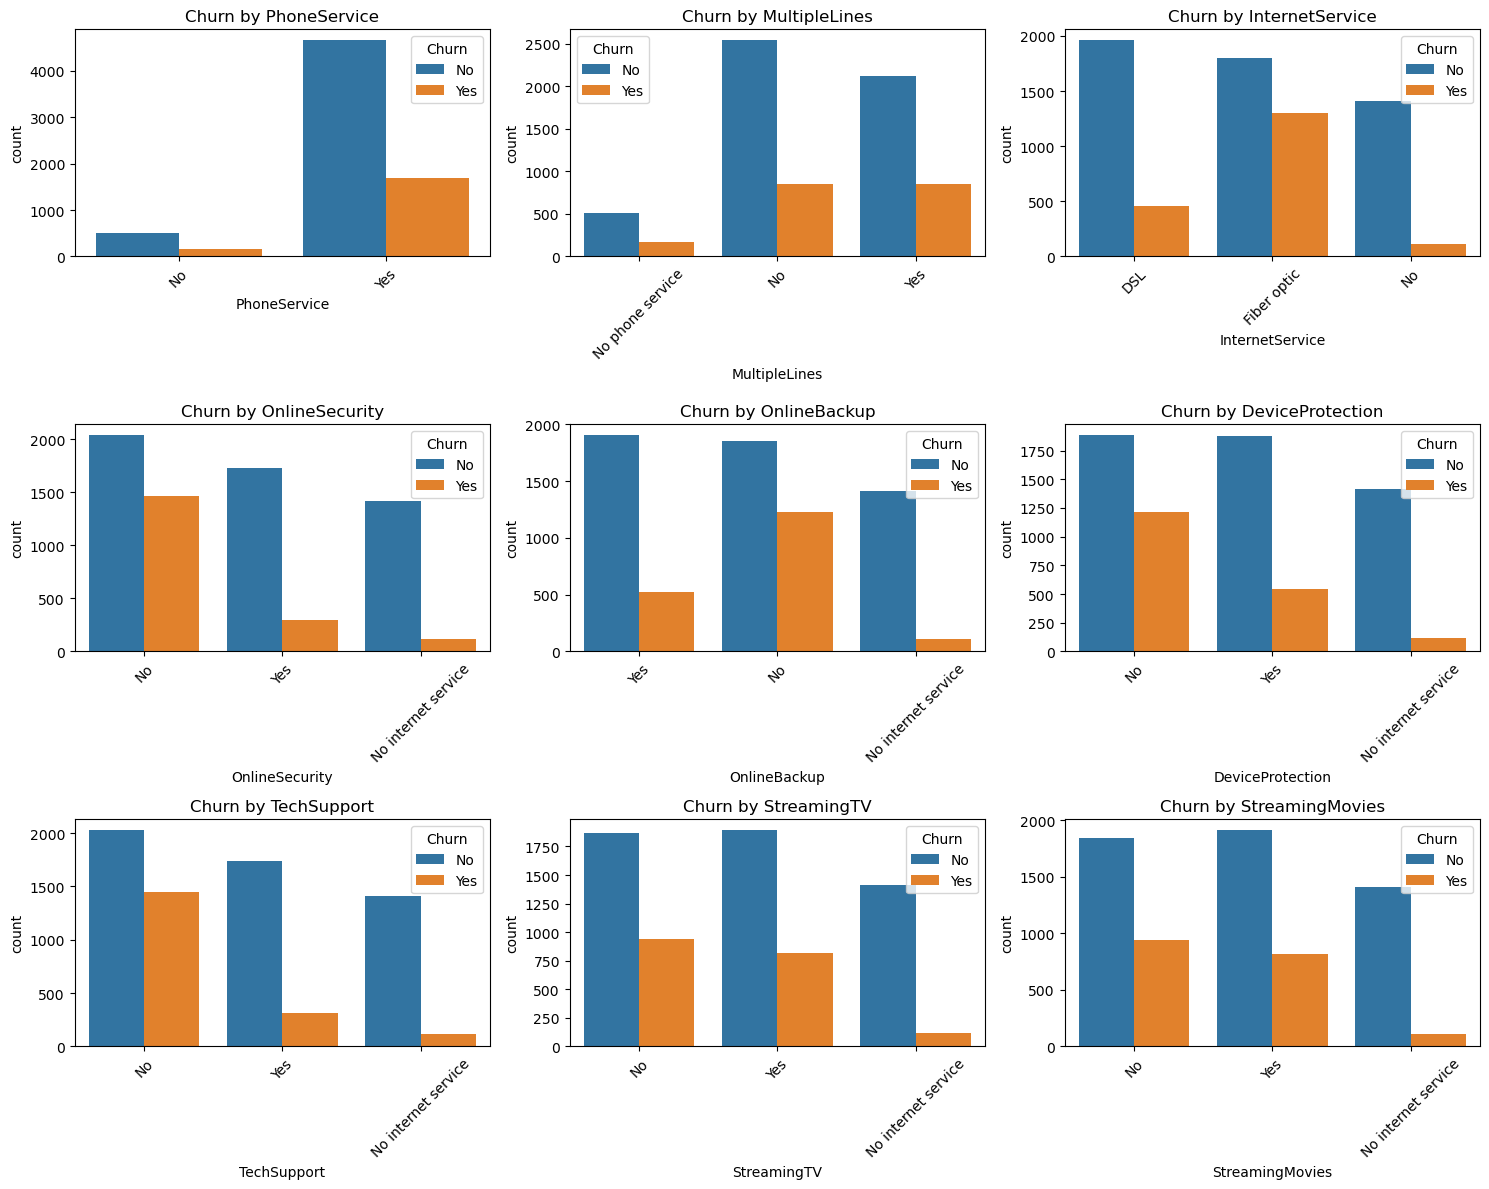

In [101]:
# List of columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up grid layout
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Define custom color palette
custom_palette = {'No': '#1f77b4', 'Yes': '#ff7f0e'}  # Blue and Orange

# Create subplots
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette=custom_palette)
    axes[i].set_title(f"Churn by {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Customers with fewer services (like security or support) tend to churn more. Fiber optic users churn more than DSL or no internet users. Higher engagement in services generally leads to lower churn.

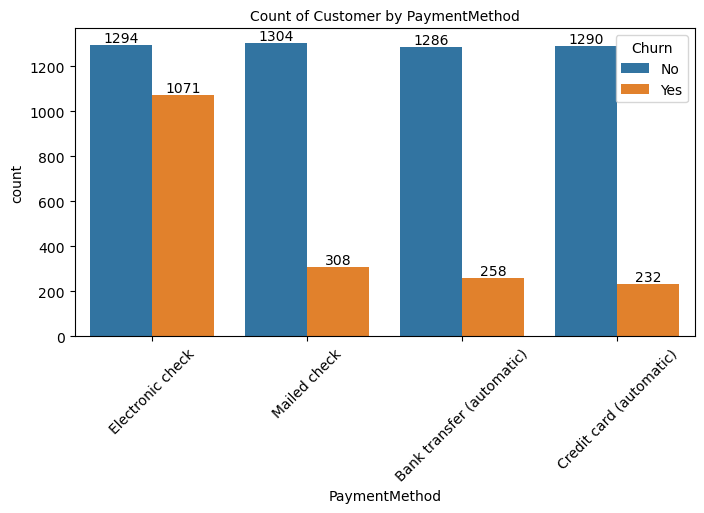

In [106]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customer by PaymentMethod",fontsize = 10)
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churned when he is using electronic check as a payment method